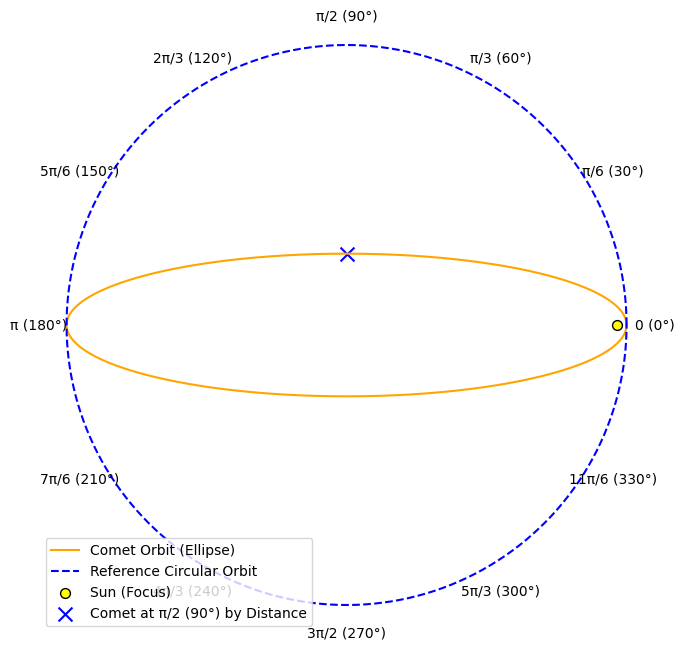

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Define eccentricity for Halley's Comet
eccentricity_halley = 0.967

# Plotting the diagram again with hidden axis and legend in the upper right corner
plt.figure(figsize=(10, 8))

# Define parameters for the ellipse (Halley's Comet) and circle (for reference)
a = 1  # Semi-major axis for simplicity
b = a * np.sqrt(1 - eccentricity_halley**2)  # Semi-minor axis for Halley's Comet, based on eccentricity
f = a * eccentricity_halley  # Distance from the center to the focus
theta = np.linspace(0, 2 * np.pi, 1000)

# Ellipse centered at the midpoint, adjusted for counterclockwise direction, with 0 radians at positive x-axis
x_ellipse = a * np.cos(theta)  # Counterclockwise orientation, cosine for x
y_ellipse = b * np.sin(theta)  # Sine for y to match counterclockwise convention

# Circle centered at the origin for comparison, adjusted for counterclockwise direction
x_circle = a * np.cos(theta)
y_circle = a * np.sin(theta)

# Plotting the ellipse and circle
plt.plot(x_ellipse, y_ellipse, color='orange', label="Comet Orbit (Ellipse)")
plt.plot(x_circle, y_circle, color='blue', linestyle='--', label="Reference Circular Orbit")

# Marking the Sun at the right focus of the ellipse (distance f from the center along the x-axis)
plt.scatter(f, 0, color='yellow', s=50, edgecolor='black', linewidth=1, marker='o', label='Sun (Focus)')

# Marking the position of Halley's Comet at π/2 radians (moving counterclockwise)
comet_theta = np.pi / 2  # π/2 radians (90 degrees) moving counterclockwise
comet_x = a * np.cos(comet_theta)
comet_y = b * np.sin(comet_theta)
plt.scatter(comet_x, comet_y, color='blue', s=100, marker='x', label="Comet at π/2 (90°) by Distance")

# Set aspect ratio to equal
plt.gca().set_aspect('equal')

# Adding labels around the circle in radians, with degrees in parentheses for all major angles
for angle in range(0, 360, 30):
    rad = np.deg2rad(angle)  # Convert degrees to radians
    x_label = 1.1 * np.cos(rad)
    y_label = 1.1 * np.sin(rad)

    # Formatting labels to show radians in fractions of π
    if angle == 0:
        label = "0 (0°)"
    elif angle == 30:
        label = "π/6 (30°)"
    elif angle == 60:
        label = "π/3 (60°)"
    elif angle == 90:
        label = "π/2 (90°)"
    elif angle == 120:
        label = "2π/3 (120°)"
    elif angle == 150:
        label = "5π/6 (150°)"
    elif angle == 180:
        label = "π (180°)"
    elif angle == 210:
        label = "7π/6 (210°)"
    elif angle == 240:
        label = "4π/3 (240°)"
    elif angle == 270:
        label = "3π/2 (270°)"
    elif angle == 300:
        label = "5π/3 (300°)"
    elif angle == 330:
        label = "11π/6 (330°)"
    elif angle == 360:
        label = "2π (360°)"
    else:
        label = f"{angle}°"
    
    plt.text(x_label, y_label, label, ha='center', va='center', fontsize=10)

# Hiding x and y axis
plt.axis('off')

# Adding grid lines for reference
plt.grid(True)

# Adding the legend in the lower left corner
plt.legend(loc='lower left')

# Show the plot
plt.show()

In [2]:
import numpy as np

def kepler_equation(x):
    return x - c * np.sin(x)

c = 0.967
position_radians = np.pi / 2 # aka 90 degrees
time_radians = kepler_equation(position_radians)

orbital_period_earth_years = 76
t_earth_years = (time_radians / (2 * np.pi)) * orbital_period_earth_years
print(f"It takes approximately {t_earth_years:.2f} Earth years for the comet to move from 0 to π/2 radians.")

It takes approximately 7.30 Earth years for the comet to move from 0 to π/2 radians.


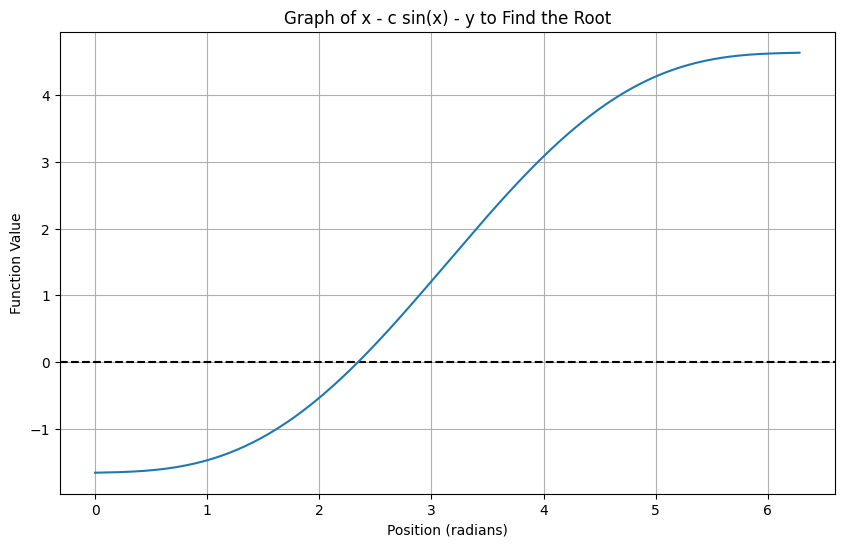

In [3]:
import numpy as np
import matplotlib.pyplot as plt

c = 0.967
time_earth_years = 20
orbital_period_earth_years = 76
time_radians = (time_earth_years / orbital_period_earth_years) * 2 * np.pi

def function_to_plot(x):
    return x - c * np.sin(x) - time_radians

# Generate x values (in radians)
x_vals = np.linspace(0, 2 * np.pi, 1000)
function_values = function_to_plot(x_vals)

plt.figure(figsize=(10, 6))
plt.axhline(0, color='black', linestyle='--') # dashed horizontal line at y=0
plt.xlabel("Position (radians)")
plt.ylabel("Function Value")
plt.title("Graph of x - c sin(x) - y to Find the Root")
plt.grid(True)

plt.plot(x_vals, function_values)
plt.show()

In [4]:
# Warning: This code will fail.
import sympy as sym
from sympy import pi, sin
from sympy.abc import x

c = 0.967
time_earth_years = 20
orbital_period_earth_years = 76

time_radians = (time_earth_years / orbital_period_earth_years) * 2 * pi

equation = x - c * sin(x) - time_radians
solution = sym.solve(equation, x)
#^^^^^^^^^^^^^error^^^^^^^^^^^^^^
print(solution)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation x - 967*sin(x)/1000 - 10*pi/19

In [5]:
import sympy as sym
from sympy import pi, sin
from sympy.abc import x

c = 0.967
time_earth_years = 20
orbital_period_earth_years = 76

time_radians = (time_earth_years / orbital_period_earth_years) * 2 * pi
equation = x - c * sin(x) - time_radians
initial_guess = 1.0   # Initial guess for the numerical solver
position_radians = sym.nsolve(equation, x, initial_guess)

print(f"After {time_earth_years} Earth years, the comet will travel {position_radians:.4f} radians ({position_radians * 180 / pi:.2f}°) along its orbit.")

After 20 Earth years, the comet will travel 2.3449 radians (134.35°) along its orbit.
